In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from time import perf_counter
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
n = 10**6
arr1 = np.array([randint(-100, 100) for _ in range(n)])
arr2 = np.array([randint(-100, 100) for _ in range(n)])

In [3]:
t_start = perf_counter()
mult_arr = np.multiply(arr1, arr2)
t_end = perf_counter()
np_time = t_end - t_start

t_start = perf_counter()
mult_arr = []
for i in range(n):
    mult_arr.append(arr1[i] * arr2[i])
t_end = perf_counter()
default_time = t_end - t_start

print(f"Numpy multiply - {np_time}")
print(f"Default time - {default_time}")

Numpy multiply - 0.0011816250043921173
Default time - 0.14049529199837707


In [4]:
data = pd.read_csv('data2.csv')
column_name = "Hardness"
data[column_name]

0       179.350577
1       193.743105
2       242.005716
3       199.083752
4       218.216682
           ...    
7181    223.374007
7182    197.028926
7183    216.736232
7184    145.797317
7185    123.336644
Name: Hardness, Length: 7186, dtype: float64

Text(0.5, 1.0, 'Normolized histogram')

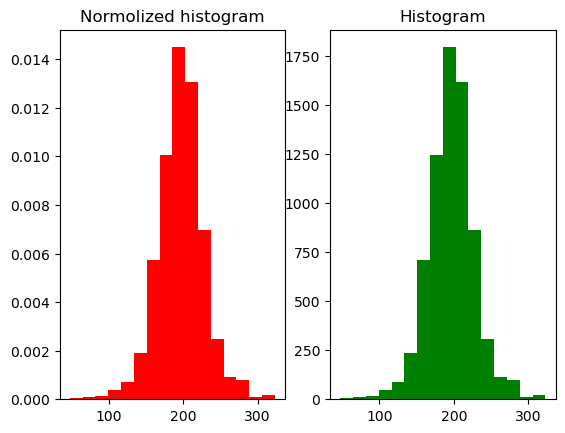

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[1].hist(data[column_name], label=column_name, color="green", bins=16)
axs[0].hist(data[column_name], density=True, label=column_name, color="red", bins=16)
axs[1].set_title('Histogram')
axs[0].set_title('Normolized histogram')


In [6]:
print(f'Standard deviation: {np.std(data[column_name])}')

Standard deviation: 30.73013850255253


/var/folders/mn/896tmd911dj762f38chp4hcm0000gn/T/ipykernel_23027/1456283753.py:3: RuntimeWarning: invalid value encountered in power
  z = np.sin(x**y)


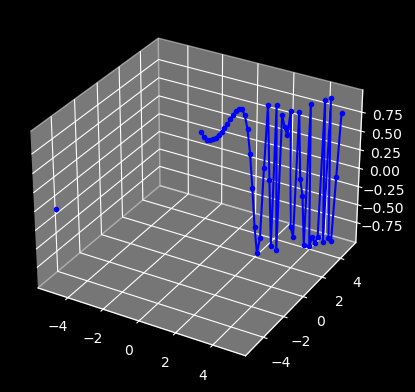

In [7]:
x = np.linspace(-5, 5, 100)
y = x
z = np.sin(x**y)
plt.style.use('dark_background')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, marker='.', color='blue')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


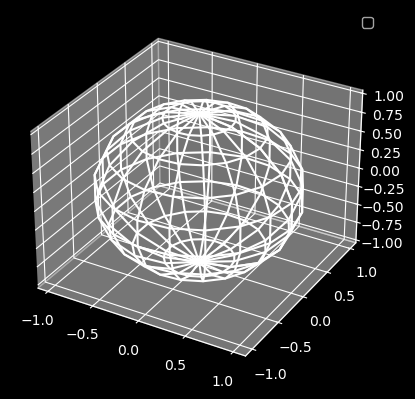

In [8]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.legend()

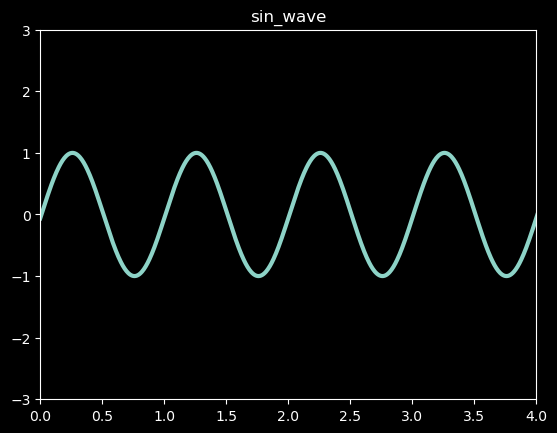

In [9]:
from matplotlib.animation import FuncAnimation, PillowWriter
plt.style.use('dark_background')
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-3, 3))
line, = ax.plot([], [], lw=3)
 
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 5, 1000)
    y = np.sin(2 * np.pi * (x + 0.01 * i))
    line.set_data(x, y)
    return line,
 
plt.title("sin_wave")
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=10, blit=True)
 
writergif = PillowWriter(fps=30)
anim.save('sin_wave.gif', writer=writergif)

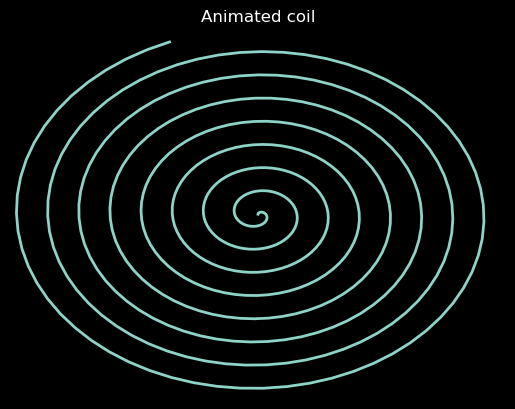

In [10]:
plt.style.use('dark_background')
 
fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [], lw=2)
 
 
def init():
    line.set_data([], [])
    return line,
 
 
xdata, ydata = [], []
 
 
def animate(i):
    t = 0.1 * i
 
    x = t * np.sin(t)
    y = t * np.cos(t)
 
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,
 
 
plt.title('Animated coil')
plt.axis('off')
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)
 
writergif = PillowWriter(fps=30)
anim.save('coil.gif', writer=writergif)
